<a href="https://colab.research.google.com/github/NguyenSang2003/Machine-Learning/blob/main/Lab_10_21130512_NguyenVanSang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods** using sklearn api.

*   **Deadline: 23:59, 20/5/2024**



# Import libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from prettytable import PrettyTable
from sklearn.metrics import make_scorer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [2]:
# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Xây dựng mô hình SVM
svm_model = SVC(kernel='linear')

# Áp dụng cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# In kết quả cross-validation
print("Kết quả cross-validation: ", cv_scores)
print("Điểm trung bình cross-validation: ", np.mean(cv_scores))

Kết quả cross-validation:  [1.         0.95833333 0.875      1.         0.95833333]
Điểm trung bình cross-validation:  0.9583333333333334


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest**, **kNN** algorithm with cross validation

In [4]:
# Chọn lọc đặc trưng (feature selection)
selector = SelectKBest(score_func=f_classif, k=2)  # Chọn 2 đặc trưng tốt nhất
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Xây dựng mô hình RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Áp dụng cross-validation cho RandomForest
rf_cv_scores = cross_val_score(rf_model, X_train_selected, y_train, cv=5)

# In kết quả cross-validation cho RandomForest
print("Kết quả cross-validation của RandomForest: ", rf_cv_scores)
print("Điểm trung bình cross-validation của RandomForest: ", np.mean(rf_cv_scores))

# Xây dựng mô hình kNN
knn_model = KNeighborsClassifier()

# Áp dụng cross-validation cho kNN
knn_cv_scores = cross_val_score(knn_model, X_train_selected, y_train, cv=5)

# In kết quả cross-validation cho kNN
print("Kết quả cross-validation của kNN: ", knn_cv_scores)
print("Điểm trung bình cross-validation của kNN: ", np.mean(knn_cv_scores))

Kết quả cross-validation của RandomForest:  [1.         0.95833333 0.83333333 0.95833333 0.95833333]
Điểm trung bình cross-validation của RandomForest:  0.9416666666666668
Kết quả cross-validation của kNN:  [0.95833333 1.         0.83333333 1.         0.95833333]
Điểm trung bình cross-validation của kNN:  0.95


*  1.3 Compare the obtained results of these approaches (SVM, RandomForest, kNN) using PrettyTable

In [5]:
# Áp dụng SVM với cross-validation
svm_model = SVC(kernel='linear')
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# Chọn lọc đặc trưng (feature selection)
selector = SelectKBest(score_func=f_classif, k=2)  # Chọn 2 đặc trưng tốt nhất
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Áp dụng RandomForest với cross-validation
rf_model = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train_selected, y_train, cv=5)

# Áp dụng kNN với cross-validation
knn_model = KNeighborsClassifier()
knn_cv_scores = cross_val_score(knn_model, X_train_selected, y_train, cv=5)

# Tạo bảng so sánh kết quả
table = PrettyTable()
table.field_names = ["Phương pháp", "Kết quả Cross-Validation", "Điểm trung bình"]

# Thêm kết quả của SVM
table.add_row(["SVM", svm_cv_scores, np.mean(svm_cv_scores)])

# Thêm kết quả của RandomForest
table.add_row(["RandomForest", rf_cv_scores, np.mean(rf_cv_scores)])

# Thêm kết quả của kNN
table.add_row(["kNN", knn_cv_scores, np.mean(knn_cv_scores)])

# In bảng kết quả
print(table)

+--------------+----------------------------------------------------------+--------------------+
| Phương pháp  |                 Kết quả Cross-Validation                 |  Điểm trung bình   |
+--------------+----------------------------------------------------------+--------------------+
|     SVM      | [1.         0.95833333 0.875      1.         0.95833333] | 0.9583333333333334 |
| RandomForest | [1.         0.95833333 0.83333333 0.95833333 0.95833333] | 0.9416666666666668 |
|     kNN      | [0.95833333 1.         0.83333333 1.         0.95833333] |        0.95        |
+--------------+----------------------------------------------------------+--------------------+


#Task 2. With fashion dataset:
*   2.1. Apply **K-Means** algorithm using k=10,

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Data_Labs_ML/Lab5'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Data_Labs_ML/Lab5


In [7]:
# Đọc dữ liệu từ cả hai tệp CSV
train_data = pd.read_csv("fashion_train.csv")
test_data = pd.read_csv("fashion_test.csv")

# Kết hợp dữ liệu từ hai tập dữ liệu
fashion_df = pd.concat([train_data, test_data], axis=0)

# Chia dữ liệu thành features (X) và labels (y)
X = fashion_df.drop('y', axis=1)
y = fashion_df['y']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Áp dụng thuật toán K-Means với k=10
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)

# Dự đoán nhãn của tập kiểm tra
y_pred = kmeans.predict(X_test)

# Tính toán silhouette score
sil_score = silhouette_score(X_test, y_pred)

# In kết quả
print("Điểm silhouette cho K-Means với k=10: ", sil_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Điểm silhouette cho K-Means với k=10:  0.15754853099954433


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **SVM** in terms of accuracy, precision, recall, f1 using cross validation.


In [9]:
# Định nghĩa các mô hình phân loại
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
svm_model = SVC(kernel='linear')

# Định nghĩa các độ đo (scoring metrics)
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Hàm để thực hiện cross-validation và trả về kết quả trung bình
def evaluate_model(model, X, y, scoring):
    results = cross_validate(model, X, y, cv=5, scoring=scoring)
    mean_results = {metric: results['test_' + metric].mean() for metric in scoring}
    return mean_results

# Đánh giá các mô hình
rf_results = evaluate_model(rf_model, X_train, y_train, scoring)
knn_results = evaluate_model(knn_model, X_train, y_train, scoring)
svm_results = evaluate_model(svm_model, X_train, y_train, scoring)

# Tạo bảng so sánh kết quả
table = PrettyTable()
table.field_names = ["Phương pháp", "Accuracy", "Precision", "Recall", "F1-Score"]

# Thêm kết quả của RandomForest
table.add_row(["RandomForest", rf_results['accuracy'], rf_results['precision'], rf_results['recall'], rf_results['f1']])

# Thêm kết quả của kNN
table.add_row(["kNN", knn_results['accuracy'], knn_results['precision'], knn_results['recall'], knn_results['f1']])

# Thêm kết quả của SVM
table.add_row(["SVM", svm_results['accuracy'], svm_results['precision'], svm_results['recall'], svm_results['f1']])

# In bảng kết quả
print(table)

+--------------+--------------------+--------------------+--------------------+--------------------+
| Phương pháp  |      Accuracy      |     Precision      |       Recall       |      F1-Score      |
+--------------+--------------------+--------------------+--------------------+--------------------+
| RandomForest | 0.8106249999999999 | 0.8101251609639595 | 0.8106249999999999 | 0.8058993801713334 |
|     kNN      | 0.7756249999999999 | 0.7950975697660694 | 0.7756249999999999 | 0.7727356851985177 |
|     SVM      | 0.8106249999999999 | 0.8151076061207926 | 0.8106249999999999 | 0.8099602033445329 |
+--------------+--------------------+--------------------+--------------------+--------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [10]:
# Nhận định và kết luận
print("Nhận định:")
print("Dựa trên các chỉ số accuracy, precision, recall và F1-Score, các phương pháp học có giám sát (RandomForest, kNN, SVM) ")
print("có hiệu suất cao hơn so với phương pháp học không giám sát (K-Means) cho bài toán phân loại dữ liệu thời trang này.")
print("\nKết luận:")
print("Phương pháp học có giám sát là tốt hơn cho bài toán này.")

Nhận định:
Dựa trên các chỉ số accuracy, precision, recall và F1-Score, các phương pháp học có giám sát (RandomForest, kNN, SVM) 
có hiệu suất cao hơn so với phương pháp học không giám sát (K-Means) cho bài toán phân loại dữ liệu thời trang này.

Kết luận:
Phương pháp học có giám sát là tốt hơn cho bài toán này.


2.4. Apply **AgglomerativeClustering** algorithm to fashion dataset using the number of clusters is 10

In [11]:
# Áp dụng AgglomerativeClustering với số cụm là 10
clustering = AgglomerativeClustering(n_clusters=10)
cluster_labels = clustering.fit_predict(X)

# In ra nhãn của các cụm
print("Nhãn của các cụm:")
print(cluster_labels)

Nhãn của các cụm:
[4 8 5 ... 4 1 1]


#Task 3.
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [12]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Data_Labs_ML/Lab10'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Data_Labs_ML/Lab10


In [19]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("shopping-data.csv")

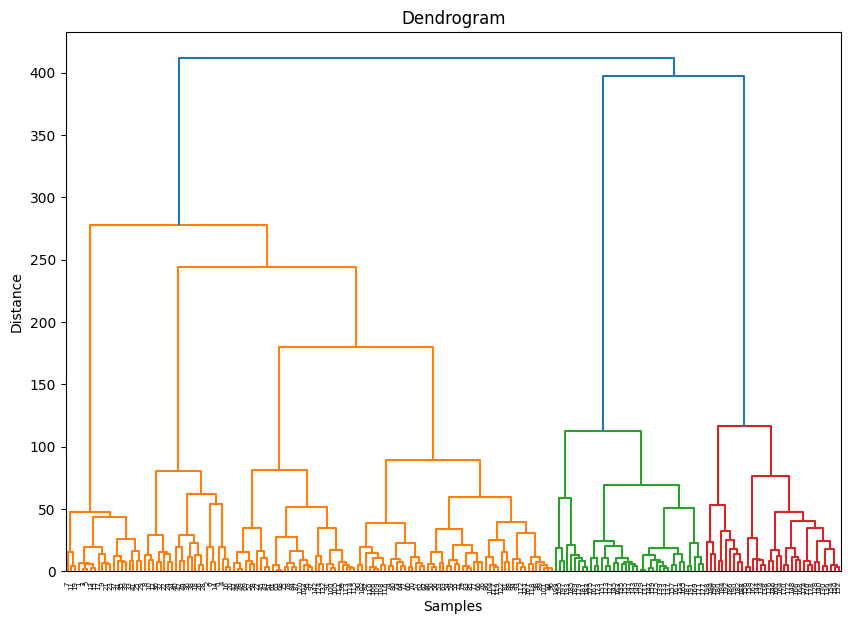

In [14]:
# Loại bỏ các thuộc tính phân loại
X = data.drop(['CustomerID', 'Genre'], axis=1)

# Tạo dendrograms
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(linkage(X, method='ward'))
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

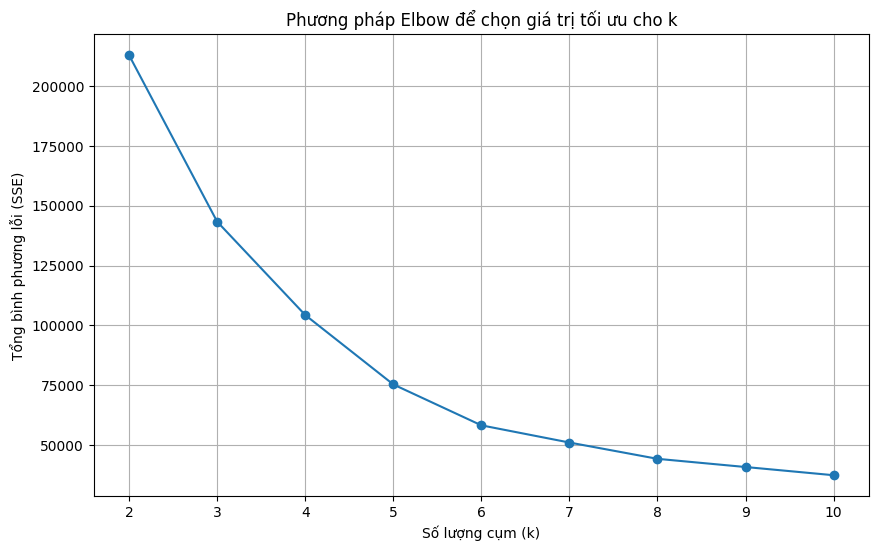

In [15]:
# Áp dụng K-Means với k từ 2 đến 10
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Vẽ biểu đồ SSE
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linestyle='-')
plt.title('Phương pháp Elbow để chọn giá trị tối ưu cho k')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Tổng bình phương lỗi (SSE)')
plt.xticks(np.arange(2, 11, step=1))
plt.grid(True)
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

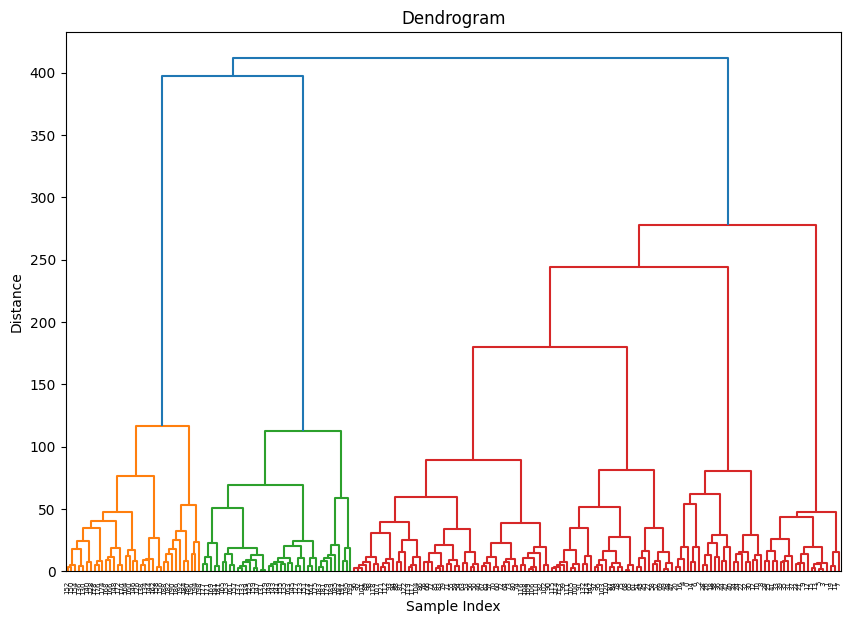

Số lượng điểm trong mỗi cụm:
Cluster
0    126
2     39
1     35
Name: count, dtype: int64


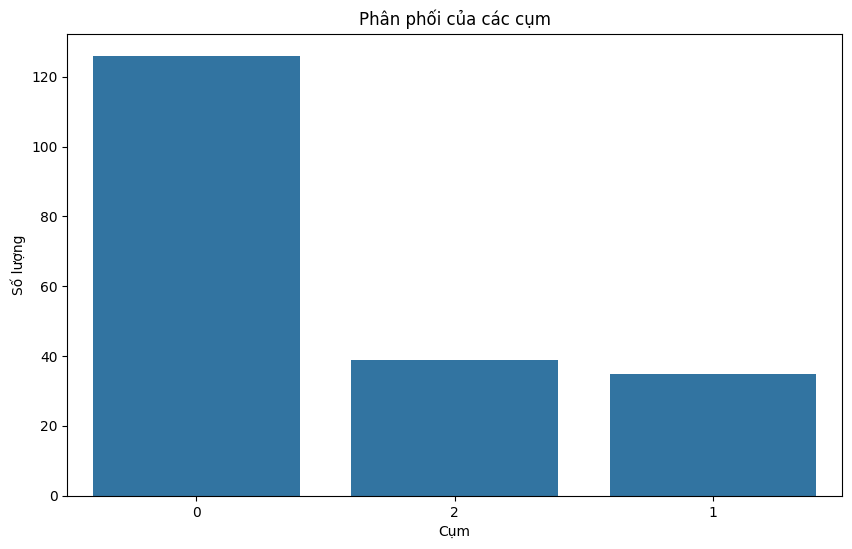

In [22]:
# Tạo dendrogram
linked = linkage(X, method='ward')

# Vẽ dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Chọn số lượng cụm từ dendrogram (tùy chỉnh dựa trên biểu đồ)
num_clusters = 3 # thay đổi giá trị này dựa trên dendrogram

# Áp dụng AgglomerativeClustering với số lượng cụm đã chọn
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = agg_cluster.fit_predict(X)

# Nếu bạn sử dụng dữ liệu mẫu
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Cluster'] = cluster_labels

# In ra số lượng điểm trong mỗi cụm
print("Số lượng điểm trong mỗi cụm:")
print(data['Cluster'].value_counts())

# Vẽ biểu đồ phân phối của các cụm
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=data, order=data['Cluster'].value_counts().index)
plt.title('Phân phối của các cụm')
plt.xlabel('Cụm')
plt.ylabel('Số lượng')
plt.show()

#Finally,
Save a copy in your Github. Remember renaming the notebook.